In [16]:
suppressPackageStartupMessages({
  library(future)
  library(Seurat)
  library(tidyverse)
  library(Seurat)
  library(ggplot2)
  library(ggrastr)   # for geom_point_rast()
  library(ggrepel)   # for geom_text_repel()
  library(dplyr)
  library(forcats)
  library(pals)      # for glasbey palette (distinct, color-blind-friendly)
  library(stringr)  
  library(RColorBrewer) # For generating high-quality color palettes
  library(cowplot)      # For the 'theme_cowplot' (a clean, minimal theme)
})

# Load Data

In [1]:
obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/harmony_cleaned_annotated_v2.rds')
obj

Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.4.3”

Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Seurat

Warning message:
“package ‘Seurat’ was built under R version 4.4.3”


An object of class Seurat 
74637 features across 352654 samples within 2 assays 
Active assay: SCT (36031 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [1]:
rm(obj)

Warning message in rm(obj):
“object 'obj' not found”


In [2]:
obj@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,5,33,36,31,31,31,51,49,49,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,10,6,20,18,21,19,18,32,32,Mesenchymal_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,5,37,19,21,20,32,35,58,58,NPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGAACAGTGTCATC-1,PRJNA1125010,2965,1417,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,8.5666105,singlet,⋯,23,34,35,37,39,39,41,42,42,Stromal/Endothelial


In [4]:
Idents(obj) <- 'SCT_snn_res.0.2'

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


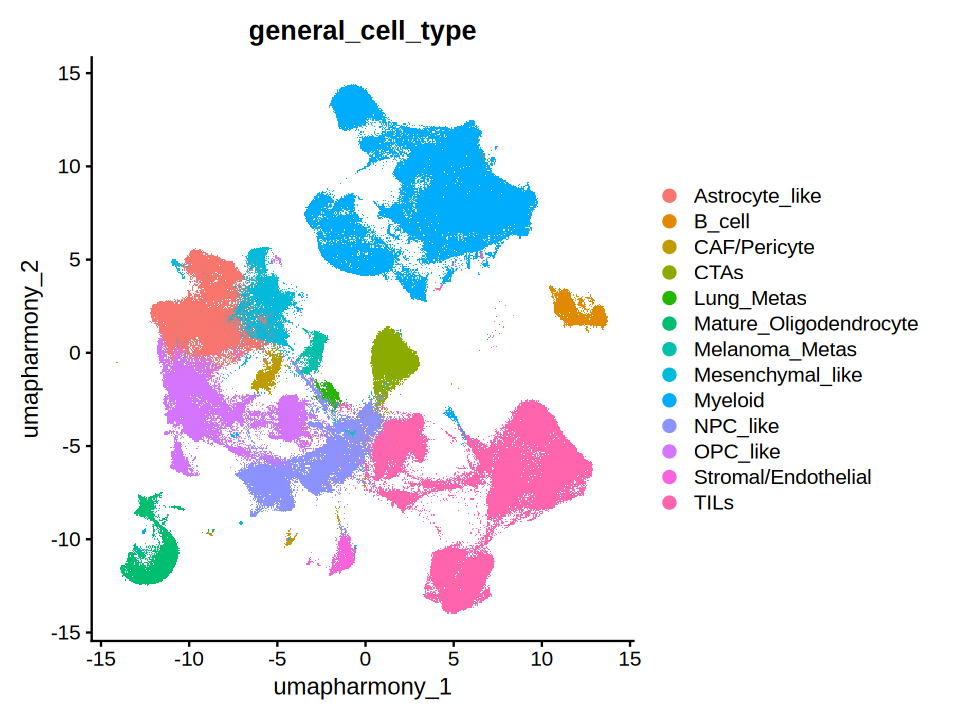

In [5]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(obj, reduction = 'umap.harmony', group.by = 'general_cell_type', label = FALSE)

In [ ]:
# Remove specified cell type annotations from the Seurat object
remove_types <- c("Melanoma_Metas", "Lung_Metas")
message("Removing annotations: ", paste(remove_types, collapse = ", "))

message("Counts before removal:")
print(table(obj$general_cell_type))

obj <- subset(obj, subset = !(general_cell_type %in% remove_types))

# Drop unused factor levels in metadata
# obj@meta.data$general_cell_type <- droplevels(obj@meta.data$general_cell_type)

# Ensure Idents reflect the current metadata column (optional but helpful for downstream code)
if ("general_cell_type" %in% colnames(obj@meta.data)) {
    Idents(obj) <- "general_cell_type"
}

message("Removal complete. Counts after removal:")
print(table(obj$general_cell_type))

Removing annotations: Melanoma_Metas, Lung_Metas

Counts before removal:




        Astrocyte_like                 B_cell           CAF/Pericyte 
                 40480                   6662                   3628 
                  CTAs             Lung_Metas Mature_Oligodendrocyte 
                 17402                   1578                  12744 
        Melanoma_Metas       Mesenchymal_like                Myeloid 
                  4178                  15646                 104413 
              NPC_like               OPC_like    Stromal/Endothelial 
                 31955                  33258                   2679 
                  TILs 
                 78031 


In [ ]:
# Save new obj 
saveRDS(obj, '/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/harmony_cleaned_annotated_v3.rds')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



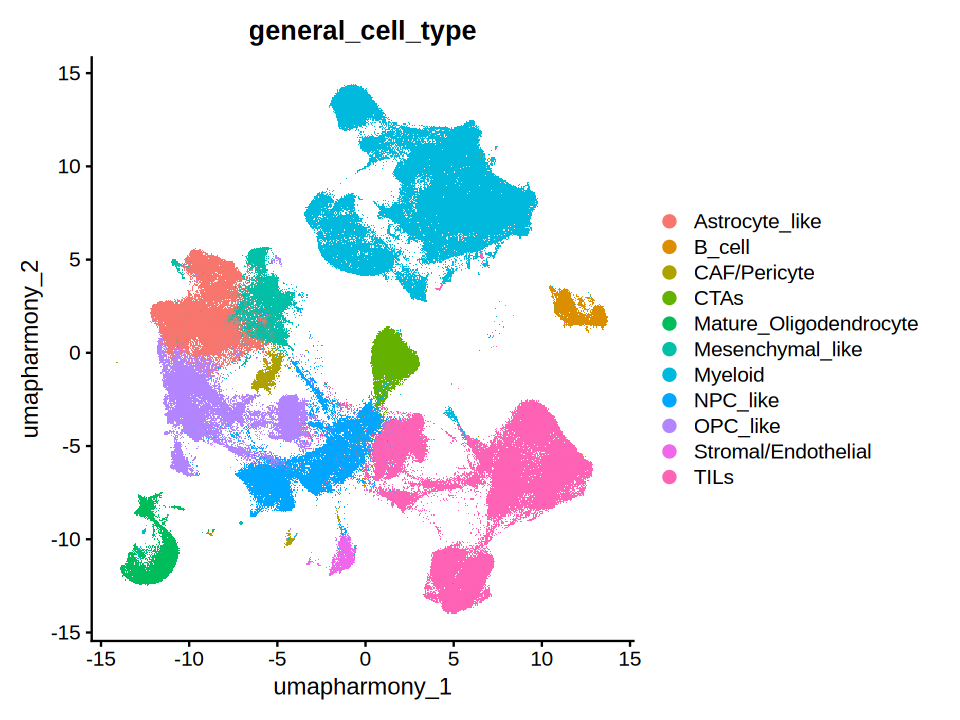

In [8]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(obj, reduction = 'umap.harmony', group.by = 'general_cell_type', label = FALSE)

# Enhanced UMAP Visualization

In [9]:
# Get all unique cell types from the specified metadata column
cell_types <- levels(factor(obj$general_cell_type))
num_cell_types <- length(cell_types)

message(paste("Found", num_cell_types, "cell types in 'general_cell_type' metadata."))

Found 11 cell types in 'general_cell_type' metadata.



In [10]:
polychrome_12 <- c(
    "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#F781BF", "#A65628",
    "#8DD3C7", "#BEBADA", "#FB8072", "#80B1D3", "#FDB462", "#678d8dff")

In [11]:
# Create the final color vector
if (num_cell_types > length(polychrome_12)) {
    # If there are more cell types than predefined colors, warn the user
    # and generate the remaining colors. Manual curation is best here.
    warning(paste("Number of cell types (", num_cell_types, ") exceeds the 25 predefined colors.
                   Generating extra colors via colorRampPalette.
                   For true publication quality, manual curation of this palette is recommended."))
    color_ramp <- colorRampPalette(polychrome_12)
    custom_colors <- color_ramp(num_cell_types)
} else {
    # Otherwise, just take the first N colors from the palette
    custom_colors <- polychrome_12[1:num_cell_types]
}

In [12]:
# Create the named vector to map colors to cell types explicitly
# This ensures consistency in plotting
names(custom_colors) <- cell_types

message("Custom color palette defined and mapped to cell types.")

Custom color palette defined and mapped to cell types.



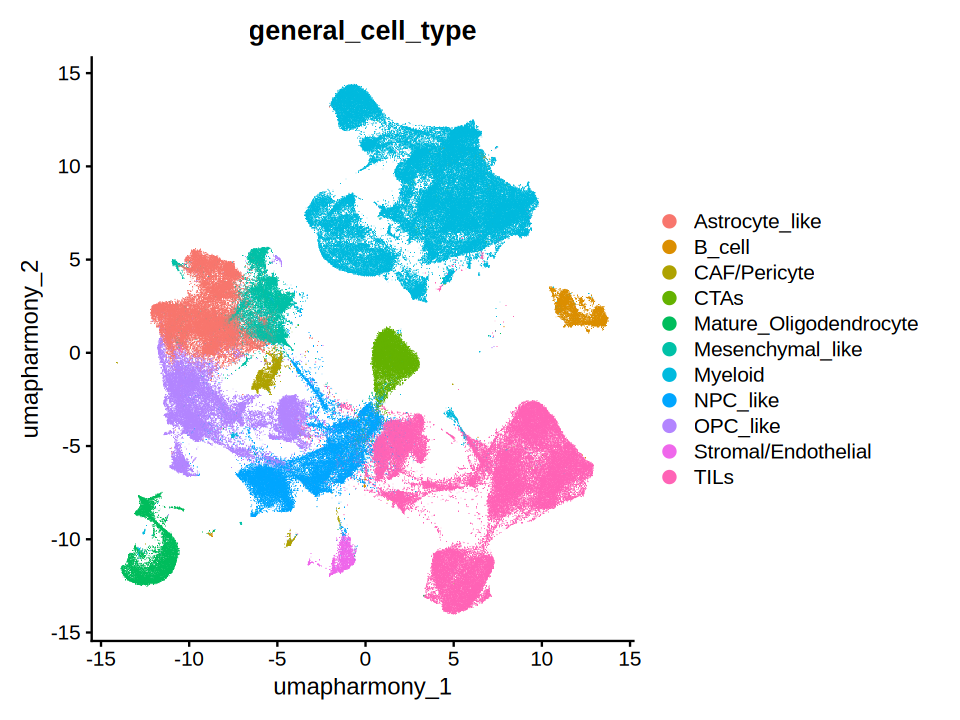

In [13]:
# Generate the base DimPlot
# We use Seurat's built-in rasterization, which is efficient
p_base <- DimPlot(
    obj,
    reduction = "umap.harmony",   # Requirement: Use 'umap.harmony'
    group.by = "general_cell_type", # Requirement: Group by cell type
    
    # Data Representation Requirements
    label = FALSE,                # Requirement: No text labels on plot
    pt.size = 1.5,                # Requirement: Small point size for 350k cells
    
    # Rasterization Requirement
    raster = TRUE,                # Requirement: Rasterize point layer
    raster.dpi = c(1024, 1024)    # High DPI for crisp points
)

p_base

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


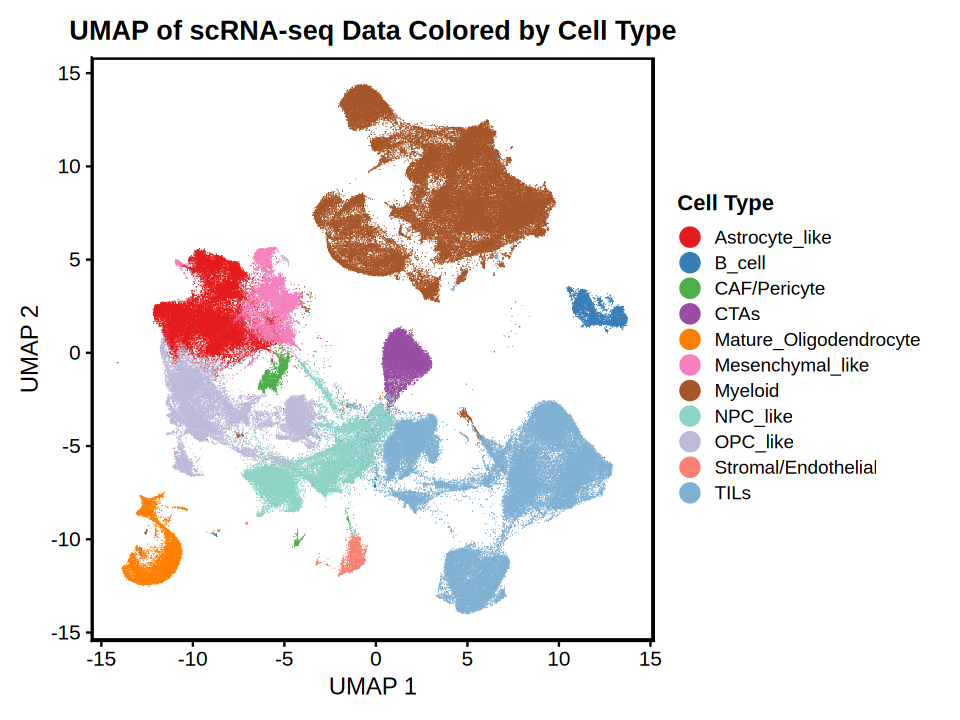

In [14]:
p_formatted <- p_base +
    # Apply the custom, named color palette
    scale_color_manual(values = custom_colors) +

    # Set correct axis and legend titles
    labs(
        x = "UMAP 1",
        y = "UMAP 2",
        title = "UMAP of scRNA-seq Data Colored by Cell Type",
        color = "Cell Type" # Renames the legend title
    ) +

    # Apply a minimal, publication-ready theme
    theme_cowplot() +
    
    # Theme adjustments for a clean, final look
    theme(
        # Set text sizes
        axis.text = element_text(size = 12, color = "black"),
        axis.title = element_text(size = 14, color = "black"),
        legend.text = element_text(size = 11, color = "black"),
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        legend.title = element_text(size = 13, face = "bold", color = "black"),
        
        # Requirement: Remove all background gridlines
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        
        # Requirement: Add a clean panel border
        panel.border = element_rect(color = "black", fill = NA, size = 1),
        
        # Ensure plot axis lines are visible
        axis.line = element_line(color = "black")
    ) +
    
    # Requirement: Increase legend point size for clarity
    guides(color = guide_legend(
        override.aes = list(size = 5),
        ncol = 1 # Ensure legend is a single vertical column
    ))

p_formatted

# Enhanced DotPlot Visualization

In [15]:
obj <- PrepSCTFindMarkers(obj, assay = "SCT", verbose = TRUE)

Found 10 SCT models. Recorrecting SCT counts using minimum median counts: 1794

Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [ ]:
Idents(obj) <- 'general_cell_type'

In [ ]:
obj

An object of class Seurat 
74637 features across 352654 samples within 2 assays 
Active assay: SCT (36031 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [ ]:
# Find all markers for all clusters
all_markers <- FindAllMarkers(
  object = obj,
  assay = "SCT",
  only.pos = TRUE,
  min.pct = 0.25,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

Calculating cluster OPC_like



Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Calculating cluster Mesenchymal_like

Calculating cluster Stromal/Endothelial

Calculating cluster Astrocyte_like

Calculating cluster TILs

Calculating cluster Myeloid

Calculating cluster Mature_Oligodendrocyte

Calculating cluster CTAs

Calculating cluster CAF/Pericyte

Calculating cluster B_cell

Calculating cluster Lung_Metas

Calculating cluster Melanoma_Metas



In [ ]:
opc <- all_markers |> filter(cluster == 'OPC_like') |> arrange(desc(avg_log2FC))
astro <- all_markers |> filter(cluster == 'Astrocyte_like') |> arrange(desc(avg_log2FC))
mesen <- all_markers |> filter(cluster == 'Mesenchymal_like') |> arrange(desc(avg_log2FC))
stromal <- all_markers |> filter(cluster == 'Stromal/Endothelial') |> arrange(desc(avg_log2FC))
tils <- all_markers |> filter(cluster == 'TILs') |> arrange(desc(avg_log2FC))
myeloid <- all_markers |> filter(cluster == 'Myeloid') |> arrange(desc(avg_log2FC))
mature_oligo <- all_markers |> filter(cluster == 'Mature_Oligodendrocyte') |> arrange(desc(avg_log2FC))
ctas <- all_markers |> filter(cluster == 'CTAs') |> arrange(desc(avg_log2FC))
caf <- all_markers |> filter(cluster == 'CAF/Pericyte') |> arrange(desc(avg_log2FC))
b_cell <- all_markers |> filter(cluster == 'B_cell') |> arrange(desc(avg_log2FC))
lung_metas <- all_markers |> filter(cluster == 'Lung_Metas') |> arrange(desc(avg_log2FC))  
melanoma_metas <- all_markers |> filter(cluster == 'Melanoma_Metas') |> arrange(desc(avg_log2FC))

In [ ]:
astro |> head(15)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
SLC4A41,0,3.784166,0.418,0.066,0,Astrocyte_like,SLC4A4
RGS6,0,3.633757,0.275,0.047,0,Astrocyte_like,RGS6
RFX4,0,3.485530,0.360,0.042,0,Astrocyte_like,RFX4
ARHGEF4,0,3.341945,0.285,0.032,0,Astrocyte_like,ARHGEF4
ADGRV1,0,3.322346,0.422,0.060,0,Astrocyte_like,ADGRV1
ANKFN1,0,3.246008,0.254,0.031,0,Astrocyte_like,ANKFN1
KLHL4,0,3.220321,0.464,0.073,0,Astrocyte_like,KLHL4
FAT3,0,3.211202,0.321,0.052,0,Astrocyte_like,FAT3
GFAP,0,3.157864,0.277,0.053,0,Astrocyte_like,GFAP


In [ ]:
cell_type_order <- c('Myeloid', 'TILs', 'B_cell', 'OPC_like', 'Astrocyte_like', 'Mesenchymal_like', 'Mature_Oligodendrocyte', 'Stromal/Endothelial', 'CAF/Pericyte', 'CTAs')

In [ ]:
markers <- c(
    # Myeloid
    'CD14', 'CD163', 'CD68',
    # TILs
    'CD3G', 'CD3D', 'CD3E',
    # B_cell
    'CD79A', 'MS4A1', 'FCRL1',
    # OPC_like
    'OLIG1', 'TNR', 'DSCAM',
    # Astrocyte_like
    'GFAP', 'SLC4A4', 'RFX4',
    # Mesenchymal_like
    'CHI3L1', 'VEGFA', 'CLU',
    # Mature_Oligodendrocyte
    'OPALIN', 'MOG', 'MAG',
    # Stromal/Endothelial
    'CLDN5', 'VWF', 'TIE1',
    # CAF/Pericyte
    'COL3A1', 'COL1A1', 'COL6A3',
    # CTAs
    'VCX', 'VCX3A', 'MAGEA4',
    # Lung_Metas
    #'NKX2-1', 'FOXA1', 'SFTA2', # SFTA2, SFTA3
    # Melanoma_Metas
    #'TYR', 'MLANA', 'PMEL'
)
obj@meta.data$general_cell_type <- factor(obj@meta.data$general_cell_type, levels = cell_type_order)
obj$general_cell_type |> levels()

[1] "Myeloid"                "TILs"                   "B_cell"                
 [4] "OPC_like"               "Astrocyte_like"         "Mesenchymal_like"      
 [7] "Mature_Oligodendrocyte" "Stromal/Endothelial"    "CAF/Pericyte"          
[10] "CTAs"                   "Lung_Metas"             "Melanoma_Metas"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.


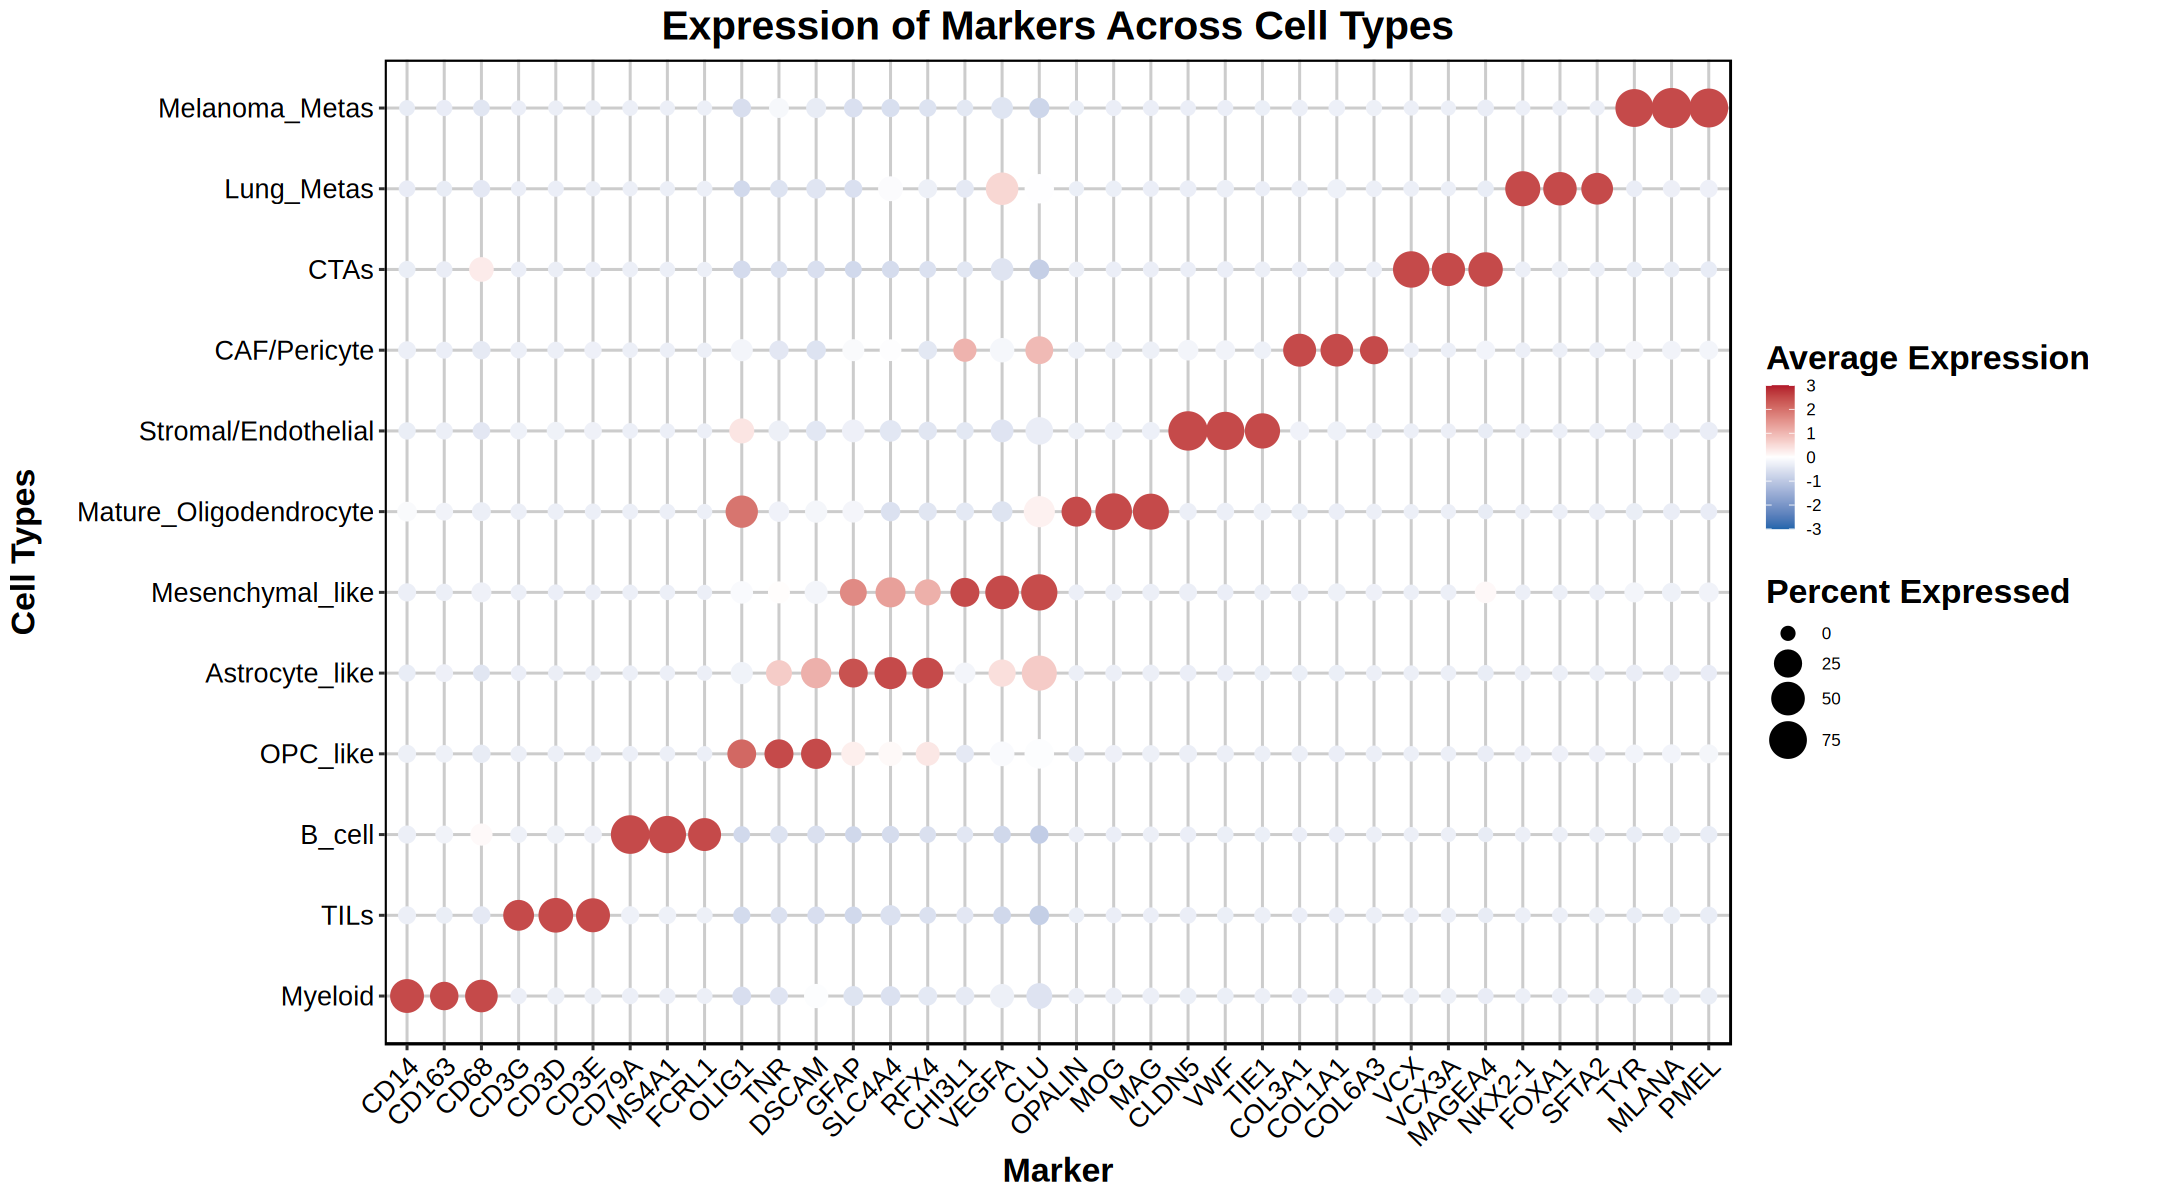

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 10)
DotPlot(
  object = obj,
  features = markers,
  group.by = "general_cell_type"
) +
  scale_color_gradientn(
    colors = c("#2166AC", "white", "#B2182B"), 
    limits = c(-3, 3)
  ) +
  scale_size(range = c(3, 10)) +
  RotatedAxis() +
  labs(
    title = "Expression of Markers Across Cell Types",
    x = "Marker",
    y = "Cell Types",
    color = "Scaled Expression",
    size = "Percent Expressing"
  ) +
  theme_bw(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 24, hjust = 0.5),
    axis.title.x = element_text(face = "bold", size = 20),
    axis.title.y = element_text(face = "bold", size = 20),
    axis.text.x = element_text(color = "black", size = 16, angle = 45, hjust = 1),
    axis.text.y = element_text(color = "black", size = 16),
    legend.title = element_text(face = "bold", size = 20),
    legend.text = element_text(size = 10),
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_blank(),
        panel.border = element_rect(color = "black", fill = NA, size = 1)
)